In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 28, 28)
(5000,)
(1000, 28, 28)
(1000,)


In [11]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

In [15]:
from tensorflow.keras.layers import Dropout,Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [22]:
m1=Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(64,activation='relu'))
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [23]:
h1=m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
157/157 [==============================] - 6s 30ms/step - loss: 0.9324 - acc: 0.6968 - val_loss: 0.3968 - val_acc: 0.8710
Epoch 2/20
157/157 [==============================] - 4s 28ms/step - loss: 0.2709 - acc: 0.9192 - val_loss: 0.2632 - val_acc: 0.9140
Epoch 3/20
157/157 [==============================] - 4s 26ms/step - loss: 0.1717 - acc: 0.9512 - val_loss: 0.2231 - val_acc: 0.9270
Epoch 4/20
157/157 [==============================] - 4s 26ms/step - loss: 0.1480 - acc: 0.9548 - val_loss: 0.1730 - val_acc: 0.9420
Epoch 5/20
157/157 [==============================] - 4s 26ms/step - loss: 0.1071 - acc: 0.9678 - val_loss: 0.1768 - val_acc: 0.9440
Epoch 6/20
157/157 [==============================] - 4s 27ms/step - loss: 0.0943 - acc: 0.9722 - val_loss: 0.1305 - val_acc: 0.9520
Epoch 7/20
157/157 [==============================] - 4s 26ms/step - loss: 0.0706 - acc: 0.9790 - val_loss: 0.1343 - val_acc: 0.9580
Epoch 8/20
157/157 [==============================] - 4s 27ms/step - 

In [24]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
15,0.019914,0.9944,0.134439,0.962,15
16,0.005648,0.9988,0.116765,0.969,16
17,0.011737,0.9956,0.248959,0.940,17
18,0.008743,0.9970,0.133426,0.967,18
19,0.001849,0.9998,0.121700,0.970,19


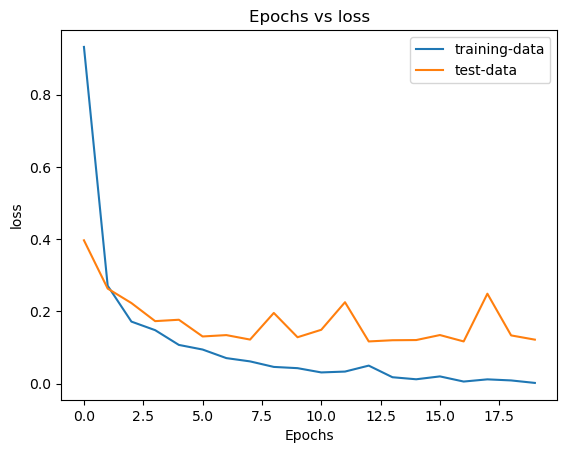

In [25]:
plt.plot(r1['Epochs'],r1['loss'],label='training-data')
plt.plot(r1['Epochs'],r1['val_loss'],label='test-data')
plt.title('Epochs vs loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

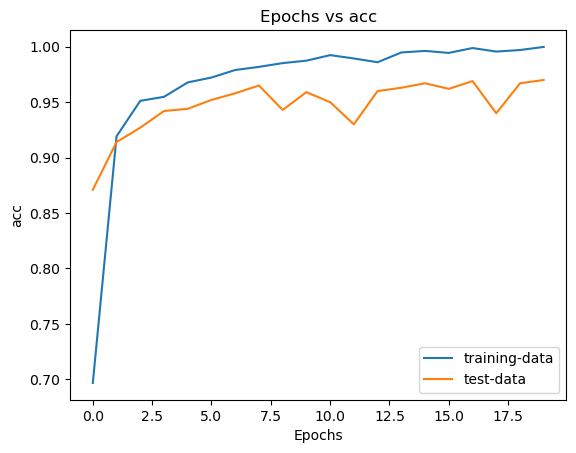

In [26]:
plt.plot(r1['Epochs'],r1['acc'],label='training-data')
plt.plot(r1['Epochs'],r1['val_acc'],label='test-data')
plt.title('Epochs vs acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [27]:
ypred=m1.predict(x_test)
ypred[:10]

32/32 [==============================] - 0s 6ms/step


array([[5.2637589e-11, 9.5157882e-09, 5.0929538e-07, 2.8574182e-06,
        1.6925955e-18, 1.0626800e-10, 9.6425881e-16, 9.9999666e-01,
        6.9681322e-12, 7.9701428e-09],
       [1.6003801e-12, 6.2000352e-14, 1.0000000e+00, 5.3836796e-12,
        8.0121655e-19, 2.8853233e-19, 8.9323290e-17, 2.7568801e-14,
        6.8858276e-13, 1.6865007e-22],
       [1.1510886e-06, 9.9998784e-01, 1.1743811e-07, 1.2929494e-09,
        5.3195271e-07, 2.6302029e-08, 1.8074501e-06, 1.2555174e-06,
        2.0191570e-07, 7.0896322e-06],
       [1.0000000e+00, 1.8384584e-10, 4.1347015e-10, 1.5205977e-19,
        9.7760579e-14, 1.9901783e-16, 2.1927527e-12, 7.2078607e-11,
        1.7293599e-17, 2.0301720e-11],
       [9.2698839e-14, 2.9665059e-12, 2.6360806e-12, 1.0624503e-14,
        1.0000000e+00, 5.5775978e-14, 2.6756761e-10, 2.4948317e-14,
        3.8352765e-16, 9.8518832e-11],
       [1.1104923e-08, 9.9999678e-01, 2.1123159e-10, 2.9605120e-11,
        1.9336408e-09, 2.7678623e-10, 2.4388662e-08, 1.37

In [31]:
ypred=[np.argmax(i) for i in ypred]
print(ypred[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
cm=confusion_matrix(y_test,ypred)
print(cm)

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  0   0 112   0   1   0   1   2   0   0]
 [  0   0   4 101   0   2   0   0   0   0]
 [  0   1   1   0 106   0   0   0   0   2]
 [  0   0   0   0   0  85   1   0   1   0]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   4   0   1   0   0  94   0   0]
 [  1   0   2   0   0   0   0   1  84   1]
 [  0   0   0   0   0   1   0   0   1  92]]


In [36]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        85
           1       0.99      1.00      1.00       126
           2       0.91      0.97      0.94       116
           3       1.00      0.94      0.97       107
           4       0.98      0.96      0.97       110
           5       0.97      0.98      0.97        87
           6       0.98      0.98      0.98        87
           7       0.97      0.95      0.96        99
           8       0.98      0.94      0.96        89
           9       0.97      0.98      0.97        94

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

